In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

from jqdatasdk import *
auth('17780620786','xxb19880825')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

auth success 


In [2]:
stocks = list(get_all_securities(['stock']).index)
security_list = stocks[:100]
start_date = '2010-01-01'
end_date = '2019-08-25'

In [3]:
money_flow_df = get_money_flow(security_list, start_date=start_date, end_date=end_date, fields=None, count=None)
money_flow_df = money_flow_df.set_index(['date', 'sec_code'])
price_df = get_price(security_list, start_date=start_date, end_date=end_date, frequency='daily', fields=['close', 'money'], skip_paused=False, fq='pre', count=None)
close_df = price_df['close']
money_df =  price_df['money']
#ret_df = (close_df/close_df.shift(1)-1)
money_cols = ['net_amount_main', 'net_amount_xl', 'net_amount_l', 'net_amount_m', 'net_amount_s']



In [26]:
money_flow_df = money_flow_df.join(money_df.stack().reset_index().rename(columns={'level_0':'date', 'level_1':'sec_code', 0:'money'}).set_index(['date', 'sec_code']), how='left')
rolling_money_df = money_flow_df[money_cols].groupby('sec_code').apply(lambda df: df.rolling(5).sum()).dropna(how='all')
rolling_money_df['money'] = rolling_money_df['money']/1e4
for col in money_cols[:-1]:
    rolling_money_df[col] = rolling_money_df[col]/rolling_money_df['money']

In [39]:
rolling_money_df.head()

net_amount_main  net_amount_xl  net_amount_l  \
date       sec_code                                                    
2010-01-08 000150.XSHE        -0.019838      -0.003473     -0.016365   
           000422.XSHE         0.033640       0.070963     -0.037323   
           000402.XSHE        -0.097556      -0.045785     -0.051771   
           000021.XSHE         0.087410       0.021178      0.066232   
           000404.XSHE        -0.026871      -0.012309     -0.014562   

                        net_amount_m  net_amount_s        money  
date       sec_code                                              
2010-01-08 000150.XSHE      0.000828      0.019010   23863.6989  
           000422.XSHE     -0.020314     -0.013327   82843.9710  
           000402.XSHE      0.010671      0.086885  297403.1300  
           000021.XSHE     -0.024489     -0.062921  108950.5602  
           000404.XSHE     -0.018743      0.045614   24498.9424

In [150]:
money_df.reset_index()[money_df.reset_index().sec_code == '000001.XSHE']#.loc[('', '000001.XSHE'),:]##.loc[[:,'000001.XSHE'],]

,date,sec_code,change_pct,net_amount_main,net_pct_main,net_amount_xl,net_pct_xl,net_amount_l,net_pct_l,net_amount_m,net_pct_m,net_amount_s,net_pct_s
84,2010-01-04,000001.XSHE,-2.71,-5106.2000,-8.8000,-1682.7200,-2.9000,-3423.4700,-5.9000,1450.6200,2.5000,3655.5700,6.3000
151,2010-01-05,000001.XSHE,-1.73,-14486.9500,-11.2000,-21213.0200,-16.4000,6726.0800,5.2000,6726.0900,5.2000,7760.8600,6.0000
186,2010-01-06,000001.XSHE,-1.72,-14450.1400,-15.3000,-13883.4700,-14.7000,-566.6800,-0.6000,4722.2700,5.0000,9727.8700,10.3000
264,2010-01-07,000001.XSHE,-1.09,-11419.1600,-14.2000,-9087.0800,-11.3000,-2332.0800,-2.9000,3297.0800,4.1000,8122.0800,10.1000
437,2010-01-08,000001.XSHE,-0.22,-7742.9500,-11.9000,-6246.4100,-9.6000,-1496.5400,-2.3000,2342.4000,3.6000,5400.5400,8.3000
505,2010-01-11,000001.XSHE,0.00,-10705.8500,-10.6000,-8483.8800,-8.4000,-2221.9700,-2.2000,3231.9600,3.2000,7473.8900,7.4000
541,2010-01-12,000001.XSHE,-0.66,-17554.9200,-13.4000,-18340.9600,-14.0000,786.0400,0.6000,5371.2800,4.1000,12183.6400,9.3000
686,2010-01-13,000001.XSHE,-6.64,-27468.8100,-13.8000,-14331.5500,-7.2000,-13137.2600,-6.6000,7563.8700,3.8000,19904.9300,10.0000
729,2010-01-14,000001.XSHE,0.05,-12200.4900,-11.2000,-11873.6900,-10.9000,-326.8000,-0.3000,3376.9200,3.1000,8823.5700,8.1000
797,2010-01-15,000001.XSHE,2.19,-1834.2000,-1.6000,-2636.6600,-2.3000,802.4700,0.7000,229.2700,0.2000,1604.9200,1.4000


In [120]:
for window in range(-5, 0):
    for money_col in money_cols:
        col = money_col+str(window)
        temp_df = rolling_money_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date')/df.set_index('date').shift(abs(window))-1)\
                        .rename(columns={money_col: col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code'])
        rolling_money_df[col] = temp_df[col]
for col in money_cols:
    rolling_money_df[col+'_ret'+'-5'] = rolling_money_df[col]/rolling_money_df[col+'-5']-1

In [40]:
stacked_df = close_df.stack()\
                     .reset_index()\
                     .rename(columns={'level_0': 'date',
                                      'level_1': 'sec_code',
                                      0: 'close'})\
                     .set_index(['date', 'sec_code'])

for window in range(-5, 11):
    if window > 0:
        col = 'ret+'+str(window)
        temp_df = stacked_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date').shift(-window)/df.set_index('date')-1)\
                        .rename(columns={'close': col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code'])
    elif window < 0:
        col = 'ret'+str(window)
        temp_df = stacked_df.reset_index()\
                        .groupby('sec_code')\
                        .apply(lambda df: df.set_index('date')/df.set_index('date').shift(abs(window))-1)\
                        .rename(columns={'close': col})\
                        .reset_index()\
                        .set_index(['date', 'sec_code'])
    stacked_df[col] = temp_df[col]
    
for col in rolling_money_df.columns:
    if col not in stacked_df.columns:
        stacked_df[col] = rolling_money_df[col]

stacked_df = stacked_df.dropna()

In [41]:
stacked_df.head()

close     ret-5     ret-4     ret-3     ret-2  \
date       sec_code                                                     
2010-01-11 000001.XSHE   7.44 -0.047375 -0.029987 -0.013263 -0.002681   
           000002.XSHE   7.60 -0.040404 -0.018088 -0.018088 -0.010417   
           000005.XSHE   5.82 -0.028381 -0.061290 -0.042763 -0.001715   
           000006.XSHE   3.32 -0.037681 -0.008955 -0.011905 -0.003003   
           000007.XSHE   4.71  0.019481 -0.016701 -0.016701  0.012903   

                           ret-1     ret+1     ret+2     ret+3     ret+4  ...  \
date       sec_code                                                       ...   
2010-01-11 000001.XSHE  0.000000 -0.006720 -0.072581 -0.072581 -0.051075  ...   
           000002.XSHE -0.016818  0.010526 -0.013158 -0.014474 -0.003947  ...   
           000005.XSHE -0.011885  0.053265  0.037801  0.042955  0.046392  ...   
           000006.XSHE -0.026393  0.042169  0.009036  0.015060  0.036145  ...   
           000007.XSHE  0.004264  0.012739 -0.014862  0.008493  0.038217  ...   

                           ret+7     ret+8     ret+9    ret+10  \
date       sec_code                                              
2010-01-11 000001.XSHE -0.053763  0.004032  0.021505 -0.017473   
           000002.XSHE -0.040789 -0.036842 -0.061842 -0.064474   
           000005.XSHE  0.012027  0.012027 -0.030928 -0.063574   
           000006.XSHE -0.003012  0.015060 -0.024096 -0.042169   
           000007.XSHE  0.036093  0.046709  0.019108 -0.002123   

                        net_amount_main  net_amount_xl  net_amount_l  \
date       sec_code                                                    
2010-01-11 000001.XSHE        -0.125044      -0.125275      0.000231   
           000002.XSHE        -0.096297      -0.055268     -0.041030   
           000005.XSHE        -0.070641      -0.035838     -0.034803   
           000006.XSHE        -0.058960      -0.016069     -0.042892   
           000007.XSHE         0.013777       0.014836     -0.001059   

                        net_amount_m  net_amount_s        money  
date       sec_code                                              
2010-01-11 000001.XSHE      0.043208      0.081836  470274.9953  
           000002.XSHE      0.008745      0.087552  738004.1351  
           000005.XSHE      0.004725      0.065916  110623.0178  
           000006.XSHE     -0.005423      0.064383   59763.8876  
           000007.XSHE      0.002764     -0.016542   10267.0556  

[5 rows x 22 columns]

In [101]:
#rolling_money_df[['net_amount_main-1']].apply(lambda x: x.clip(np.percentile(x, 0.05), np.percentile(x, 0.95)))

In [55]:
stacked_df.corr()[['ret+1', 'ret+2', 'ret+3', 'ret+4', 'ret+5', 'net_amount_main', 'net_amount_xl', 'net_amount_l','net_amount_m', 'net_amount_s']]

,ret+1,ret+2,ret+3,ret+4,ret+5,net_amount_main,net_amount_xl,net_amount_l,net_amount_m,net_amount_s
close,-0.012075,-0.018072,-0.022371,-0.026082,-0.029554,0.007672,-0.021933,0.030190,0.051108,-0.039947
ret-5,0.038428,0.025213,0.025110,0.024940,0.023666,0.480821,0.404570,0.332787,-0.109085,-0.493803
ret-4,0.054602,0.042451,0.035254,0.031888,0.028918,0.486928,0.414196,0.333081,-0.117262,-0.495873
ret-3,0.054596,0.047773,0.044597,0.035466,0.029139,0.430126,0.370743,0.289962,-0.110229,-0.433934
ret-2,0.057389,0.044506,0.047868,0.042602,0.029760,0.362383,0.316716,0.240471,-0.099694,-0.361320
ret-1,0.088450,0.057616,0.055182,0.055198,0.043826,0.272269,0.242614,0.176591,-0.083670,-0.265854
ret+1,1.000000,0.736175,0.592153,0.515705,0.465316,0.042857,0.048231,0.018995,-0.013465,-0.042004
ret+2,0.736175,1.000000,0.836835,0.721519,0.649614,0.040070,0.045733,0.017201,-0.011202,-0.040156
ret+3,0.592153,0.836835,1.000000,0.881896,0.788248,0.038817,0.042932,0.017864,-0.008951,-0.040084
ret+4,0.515705,0.721519,0.881896,1.000000,0.907685,0.037290,0.041035,0.017344,-0.007598,-0.039166


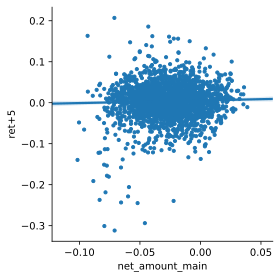

In [48]:
grouped_df = stacked_df.reset_index().groupby('date').mean()
sns.lmplot(x="net_amount_main", y="ret+5", data=grouped_df, height=4, robust=True,
           scatter_kws={"s": 10, "alpha": 1})
# plt.xlim(-1, 1)

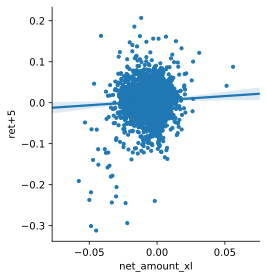

In [49]:
sns.lmplot(x="net_amount_xl", y="ret+5", data=grouped_df, height=4, robust=True,
           scatter_kws={"s": 10, "alpha": 1})


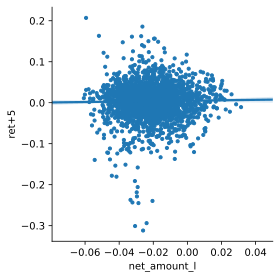

In [51]:
sns.lmplot(x="net_amount_l", y="ret+5", data=grouped_df, height=4, robust=True,
           scatter_kws={"s": 10, "alpha": 1})


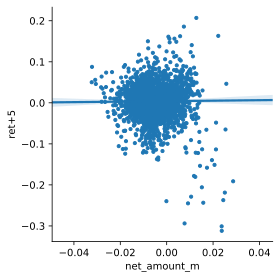

In [50]:
sns.lmplot(x="net_amount_m", y="ret+5", data=grouped_df, height=4,  robust=True,
           scatter_kws={"s": 10, "alpha": 1})


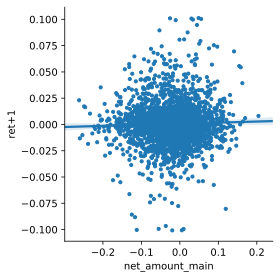

In [57]:
plot_df = stacked_df.query('sec_code == "000001.XSHE"').reset_index()
sns.lmplot(x="net_amount_main", y="ret+1", data=plot_df, height=4,
           scatter_kws={"s": 10, "alpha": 1})

* 大单当日占比与历史收益率有显著正相关关系
* 与未来收益率关系似乎不大

In [61]:
# sns.lmplot(x="net_pct_main", y="ret+1", col='col', data=grouped_df, height=4, col_wrap=2, 
#            scatter_kws={"s": 50, "alpha": 1})

In [22]:
df = group_money_df.stack().reset_index().rename(columns={'date':'date', 
                                                          'level_1': 'mfl',
                                                          0: 'value'})

In [71]:
close_df.stack().reset_index().rename(columns={'level_0': 'date',
                                               'level_1': 'sec_code',
                                               0: 'close'}).dtypes

date        datetime64[ns]
sec_code            object
close              float64
dtype: object

In [76]:
df = close_df.stack().reset_index().rename(columns={'level_0': 'date',
                                               'level_1': 'sec_code',
                                               0: 'close'})
merged_df = df.set_index(['date', 'sec_code']).join(money_df.set_index(['date', 'sec_code'])).reset_index()[['date', 'sec_code'] + money_cols + ['close']].dropna()

,date,sec_code,close
0,2010-01-04,000001.XSHE,7.81
1,2010-01-04,000002.XSHE,7.92
2,2010-01-04,000004.XSHE,10.00
3,2010-01-04,000005.XSHE,5.99
4,2010-01-04,000006.XSHE,3.45


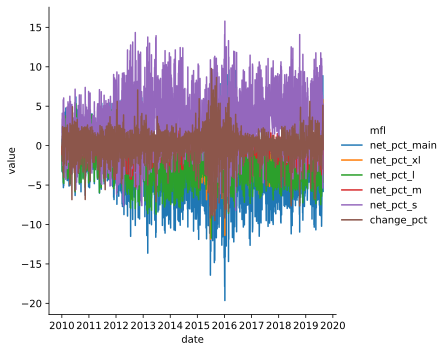

In [42]:

sns.relplot(x="date", y="value",
            hue="mfl", facet_kws=dict(sharex=False),
            kind="line",data=df)

In [82]:
stacked_df

close     ret-5     ret-4     ret-3     ret-2  \
date       sec_code                                                     
2010-01-11 000001.XSHE   7.44 -0.047375 -0.029987 -0.013263 -0.002681   
           000002.XSHE   7.60 -0.040404 -0.018088 -0.018088 -0.010417   
           000005.XSHE   5.82 -0.028381 -0.061290 -0.042763 -0.001715   
           000006.XSHE   3.32 -0.037681 -0.008955 -0.011905 -0.003003   
           000007.XSHE   4.71  0.019481 -0.016701 -0.016701  0.012903   
           000009.XSHE   4.82  0.019027  0.045553  0.047826  0.027719   
           000010.XSHE   2.88 -0.023729 -0.006897 -0.017065  0.024911   
           000011.XSHE   9.28 -0.015907  0.015317  0.013100  0.036872   
           000012.XSHE   5.98 -0.065625 -0.050794 -0.078582 -0.027642   
           000014.XSHE  13.97 -0.056081 -0.023760 -0.033887 -0.018271   
           000016.XSHE   3.25 -0.081921 -0.081921 -0.024024  0.006192   
           000018.XSHE   2.37  0.053333  0.030435  0.025974  0.053333   
           000019.XSHE   4.91 -0.031558 -0.041016 -0.050290 -0.002033   
           000020.XSHE  10.39 -0.065647 -0.085387 -0.055455 -0.021657   
           000021.XSHE   8.45  0.064232  0.040640  0.047088  0.034272   
           000022.XSHE  11.49 -0.005195 -0.009483 -0.029561  0.000871   
           000023.XSHE   9.25 -0.022199 -0.032427 -0.059003 -0.054192   
           000024.XSHE  15.04 -0.058824 -0.014417 -0.020833 -0.018917   
           000025.XSHE   7.88  0.020725  0.019405  0.008963  0.034121   
           000026.XSHE   7.92 -0.014925 -0.008761 -0.056019 -0.008761   
           000027.XSHE   6.06 -0.003289 -0.003289 -0.001647  0.021922   
           000028.XSHE  25.09 -0.042732 -0.067979 -0.082297 -0.039801   
           000029.XSHE   7.14  0.004219  0.021459  0.017094  0.021459   
           000030.XSHE   5.04  0.039175  0.018182  0.030675  0.052192   
           000031.XSHE  10.09 -0.016569  0.003980  0.002982 -0.010784   
           000032.XSHE   7.04  0.020290  0.000000  0.023256  0.065053   
           000033.XSHE   6.43  0.158559  0.162749  0.114385  0.045528   
           000035.XSHE   3.34 -0.011834 -0.002985  0.003003  0.012121   
           000036.XSHE   3.98 -0.056872 -0.047847 -0.036320  0.007595   
           000037.XSHE   7.15 -0.004178 -0.019204 -0.024557  0.002805   
...                       ...       ...       ...       ...       ...   
2019-08-09 000156.XSHE   9.03 -0.073846 -0.071942 -0.024838 -0.012035   
           000157.XSHE   5.37 -0.061189 -0.034173 -0.016484 -0.012868   
           000158.XSHE   4.78 -0.087786 -0.070039 -0.028455 -0.028455   
           000159.XSHE   6.10 -0.075758 -0.071537 -0.009740 -0.012945   
           000166.XSHE   4.55 -0.033970 -0.023605 -0.010870 -0.002193   
           000301.XSHE   4.99 -0.040385 -0.017717  0.000000 -0.002000   
           000333.XSHE  51.22 -0.029005 -0.007364 -0.005630  0.003723   
           000338.XSHE  11.11 -0.052856 -0.024583  0.001803  0.006341   
           000400.XSHE   7.76 -0.071770 -0.061669 -0.015228 -0.008940   
           000401.XSHE  15.60 -0.077469 -0.042945 -0.046455 -0.021330   
           000402.XSHE   7.16 -0.027174 -0.005556  0.005618  0.007032   
           000403.XSHE  27.00 -0.001110  0.006336 -0.002217  0.004838   
           000404.XSHE   3.83 -0.056650 -0.047264 -0.015424 -0.007772   
           000407.XSHE   3.31 -0.056980 -0.040580  0.003030  0.003030   
           000408.XSHE   9.10 -0.125000 -0.082661 -0.031915 -0.022556   
           000409.XSHE   4.64  0.049774  0.000000 -0.008547 -0.002151   
           000410.XSHE   5.23 -0.082456 -0.059353 -0.054250 -0.022430   
           000411.XSHE  11.59 -0.060016 -0.053878 -0.007705 -0.009402   
           000413.XSHE   4.37 -0.070213 -0.052061 -0.011312 -0.006818   
           000415.XSHE   3.41 -0.065753 -0.036723 -0.014451 -0.008721   
           000416.XSHE   5.44 -0.115447 -0.096346 -0.050611 -0.030303   
           000417.XSHE   4.39 -0.071882 -0.051836 -0.028761 -0.017897   
         

In [79]:
def get_event_perf(close_df, event_fn, event_window=20):
    event_df = None
    for symbol in close_df.columns:
        try:
            temp_df = pd.DataFrame()
            df = close_df[symbol]
            event_idx = event_fn(symbol)
            for window in range(-event_window//2, event_window+1):
                col = str(window)
                if window >= 0:
                    temp_df[col] = (df.shift(-window)/df-1)[event_idx].fillna(0)
                else:
                    temp_df[col] = (df/df.shift(-window)-1)[event_idx].fillna(0)

            if event_df is None:
                event_df = temp_df
            else:
                event_df = pd.concat([event_df, temp_df], ignore_index=True, sort=False)
        except:
            continue
    event_df = event_df.dropna().mean()
    return event_df

In [59]:
def plot_event_analysis(event_df, title='Event analysis'):
    x = event_df.index.map(lambda x: int(x))
    y = event_df.values
    plt.figure(figsize=(12,5))
    plt.plot(x, y)
    plt.vlines(0, -0.5, 0.5)
    plt.hlines(0.1, x.min(), x.max(), 'c', '--')
    plt.ylim(event_df.min(), event_df.max())
    plt.title(title)
    plt.show()

In [80]:
#000406.XSHE




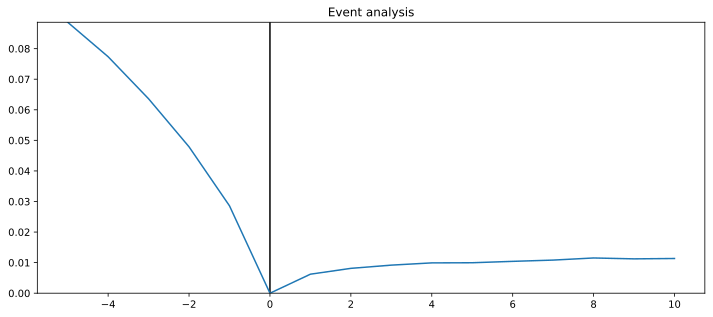

In [81]:
event_fn = lambda s: stacked_df.unstack()['net_amount_main'][stacked_df.unstack()['net_amount_main'][s] > 0.1].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

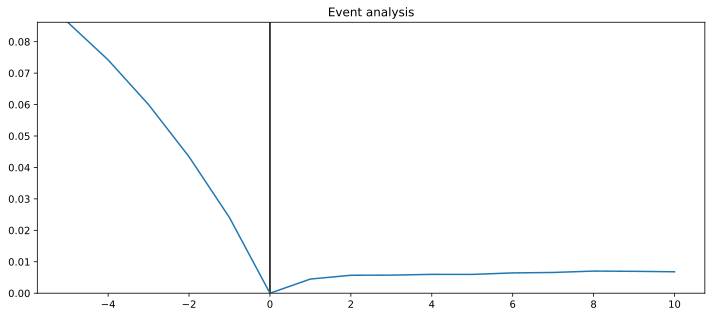

In [83]:
event_fn = lambda s: stacked_df.unstack()['net_amount_xl'][stacked_df.unstack()['net_amount_xl'][s] > 0.05].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

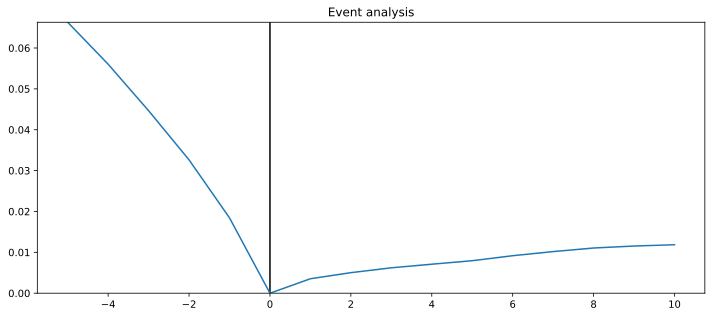

In [84]:
event_fn = lambda s: stacked_df.unstack()['net_amount_s'][stacked_df.unstack()['net_amount_s'][s] < -0.05].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

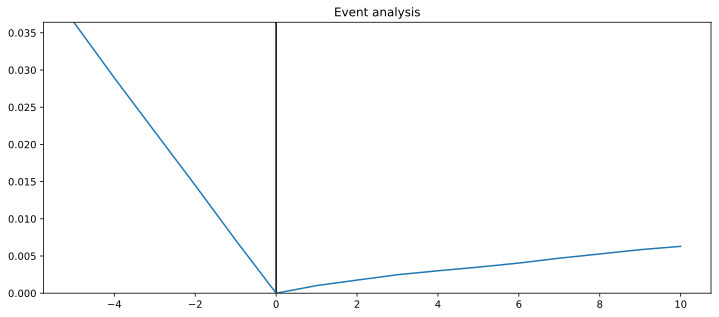

In [338]:
event_fn = lambda s: close_df[close_df[s] > close_df[s].shift(10)].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)

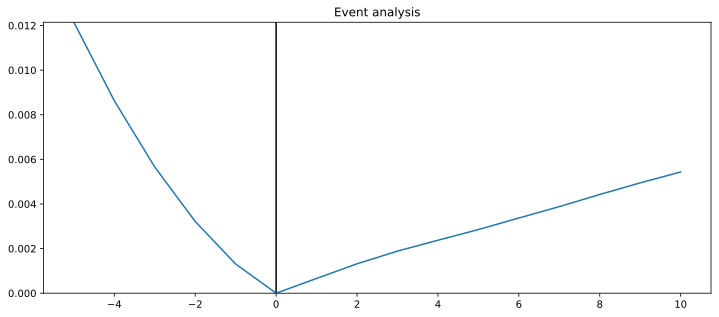

In [340]:
event_fn = lambda s: close_df[close_df[s].rolling(10).mean() > close_df[s].rolling(40).mean()].index
event_df = get_event_perf(close_df, event_fn, event_window=10)
plot_event_analysis(event_df)